# MovieLens dataset report
## Prepare

In [28]:
from movielens_analysis import Movies, Links, Ratings, Tags, Statistics

In [29]:
MOVIES_CSV = 'ml-latest-small/movies.csv'
LINKS_CSV = 'ml-latest-small/links.csv'
RATINGS_CSV = 'ml-latest-small/ratings.csv'
TAGS_CSV = 'ml-latest-small/tags.csv'

## Movies analysis

### Distribution by release year
Проанализировав данные о распределении количества выпущенных фильмов по годам, мы можем прийти к следующим выводам: Киноиндустрия зародилась в начале 20-го века. С 80-х годов мы наблюдаем существенный рост количества выпускаемых фильмов. Это может быть связано с рядом факторов: развитием технологий, ростом населения, изменением образа жизни людей, когда кино становится одним из важных видов досуга, а также высокоприбыльным бизнесом. Пик приходится на 2002-й год: в этот год было выпущено 311 фильмов. Однако с середины 2010-х мы наблюдаем снижение количества фильмов с уходом в крутое пике в 2018г. Резкое уменьшение в 2018 году мы можем объяснить возможно неполными данными за этот год (выгрузка csv была за неполный год на момент составления задания). Общее падение в 2010-х годах можно связать с развитием стриминговых платформ и повышение интереса аудитории к сериалам и переориентации киноиндустрии с полнометражных фильмов на производство сериалов.

In [3]:
movies = Movies(MOVIES_CSV)

In [59]:
%timeit movies.dist_by_release()
dist_by_release = movies.dist_by_release()

tmp = list(dist_by_release.items())
for index in range(len(tmp)):
    print(f'{tmp[index][0]} : {tmp[index][1]}', end='\t')
#     df.merge(tmp[index])
    index += 1
    if index % 5 == 0:
        print()
        
        
# print('\n')

39.8 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2002 : 311	2006 : 295	2001 : 294	2007 : 284	2000 : 283	
2009 : 282	2003 : 279	2004 : 279	2014 : 278	1996 : 276	
2015 : 274	2005 : 273	2008 : 269	1999 : 263	1997 : 260	
1995 : 259	1998 : 258	2011 : 254	2010 : 247	2013 : 239	
1994 : 237	2012 : 233	2016 : 218	1993 : 198	1992 : 167	
1988 : 165	1987 : 153	1990 : 147	1991 : 147	2017 : 147	
1989 : 142	1986 : 139	1985 : 126	1984 : 101	1981 : 92	
1980 : 89	1982 : 87	1983 : 83	1979 : 69	1977 : 63	
1973 : 59	1978 : 59	1965 : 47	1971 : 47	1974 : 45	
1976 : 44	1964 : 43	1967 : 42	1968 : 42	1975 : 42	
1966 : 42	2018 : 41	1962 : 40	1972 : 39	1963 : 39	
1959 : 37	1960 : 37	1955 : 36	1969 : 35	1961 : 34	
1970 : 33	1957 : 33	1958 : 31	1953 : 30	1956 : 30	
1940 : 25	1949 : 25	1954 : 23	1942 : 23	1939 : 23	
1946 : 23	1951 : 22	1950 : 21	1947 : 20	1948 : 20	
1941 : 18	1936 : 18	1945 : 17	1937 : 16	1952 : 16	
1944 : 16	1938 : 15	1931 : 14	1935 : 13	1933 : 12	
1934 : 11	1943 : 10	1932 : 9

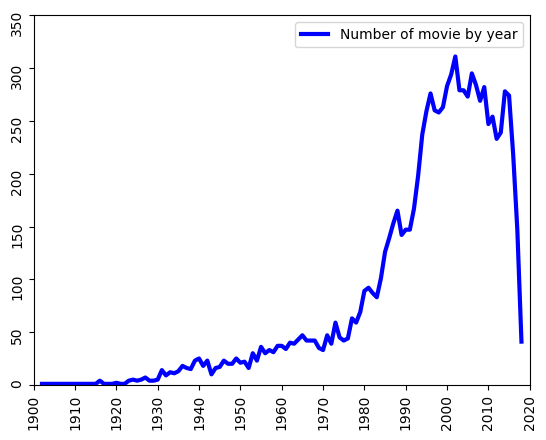

In [61]:
# Визуализация данных 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dict1 = dist_by_release.items()
df = pd.DataFrame(dict1)
df.columns = ['Year', 'Count']
df['Year'] = df['Year'].astype(str).astype(int)

# отсортировал по годам
df = df.sort_values(by=['Year'])

plt.plot(df['Year'], df['Count'], label="Number of movie by year", color ='blue', linewidth = 3)
plt.axis([1900, 2020, 0, 350])
plt.xticks(np.arange(1900, 2021,10))

plt.tick_params(labelrotation = 90)    #  Поворот подписей
plt.legend()
plt.show()

### Distribution of genres

Мы видим, что больше всего фильмов снимается в жанре драма и комедия. Они лидируют с большим отрывом:  4361 и 3756, тогда как остальные жанры идут с большим отставанием (количество фильмов в этих жанрах менее 2000). Фильмов в формате  IMAX  снималось совсем немного (158). А меньше всего фильмов снято в жанре Noir (87).

In [62]:
%timeit movies.dist_by_genres()
movies = Movies(MOVIES_CSV)

for key, value in movies.dist_by_genres().items():
    print(f'{key:<20} : {value}')

print()

34.1 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Drama                : 4361
Comedy               : 3756
Thriller             : 1894
Action               : 1828
Romance              : 1596
Adventure            : 1263
Crime                : 1199
Sci-Fi               : 980
Horror               : 978
Fantasy              : 779
Children             : 664
Animation            : 611
Mystery              : 573
Documentary          : 440
War                  : 382
Musical              : 334
Western              : 167
IMAX                 : 158
Film-Noir            : 87



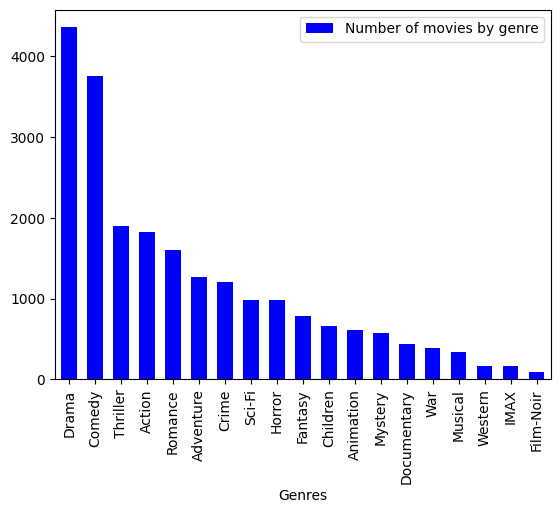

In [63]:
# визуализация
data = movies.dist_by_genres().items()
df = pd.DataFrame(data)
df.columns = ['Genres', 'Number']
df['Number'] = df['Number'].astype(str).astype(int)
df.plot.bar(x='Genres', y='Number', label="Number of movies by genre", color=('blue'), width=0.6)
plt.show()


### 30 most genres films

Мы видим, что некоторые фильмы сложно отнести к какому-то одному жанру. Рекордсменом явялется фильм Rubber 2010 года - его отнесли к 10 жанрам, и это абсолютный лидер этого списка. В описании к фильму сказано: "Это французский абсурдно-комедийный фильм ужасов 2010 года об автомобильной покрышке, которая ожила и стала убивать людей при помощи телекинеза." Заинтригованы? Мы тоже. 

In [15]:
%timeit movies.most_genres(30)
movies = Movies(MOVIES_CSV)

print(f'{"Film":<70}Ganres number')
for key, value in movies.most_genres(30).items():
    print(f'{key:<70}{value}')

print()

29.3 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Film                                                                  Ganres number
Rubber (2010)                                                         10
Patlabor: The Movie (Kidô keisatsu patorebâ: The Movie) (1989)        8
Mulan (1998)                                                          7
Who Framed Roger Rabbit? (1988)                                       7
Osmosis Jones (2001)                                                  7
Interstate 60 (2002)                                                  7
Robots (2005)                                                         7
Pulse (2006)                                                          7
Aqua Teen Hunger Force Colon Movie Film for Theaters (2007)           7
Enchanted (2007)                                                      7
Aelita: The Queen of Mars (Aelita) (1924)                             7
Inception (2010)                                     

## Links analysis

### Get imdb information

В данном разделе мы получаем данные по нашей выборке фильмов, подключаясь к внешней веб-странице (https://www.imdb.com/) . 
Парсинг сайта и поиск и загрузка необходимых данных занимает существенное время, а использование предварительно загруженных данных нам запрещено заданием.
В рамках задания, чтобы ограничить время выполнения проекта, мы ограничились выборкой из первых 30 фильмов по айди. 

Мы получаем необходимые данные по заданным фильмам. Так мы получаем данные о режиссере фильма, количестве наград, бюджете, сборах и продолжительности фильма в секундах. 

In [ ]:
%timeit links.get_imdb([1, 2, 3, 4], ['directors', 'wins', 'productionBudget', 'lifetimeGross', 'runtime'])

In [22]:
fields = ['directors', 'wins', 'productionBudget', 'lifetimeGross', 'runtime']
imdb_info = links.get_imdb([1, 3, 5, 7, 15], fields)

print(f'{"MovieID":<16}{"Directors":<24}{"Wins":<15} {"Budget":<23} {"Gross":<23} {"RunTime":<15}')
for movie in imdb_info:
    print(*movie, sep='\t\t')

4.58 s ± 334 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

MovieID         Directors               Wins            Budget                  Gross                   RunTime        
1		John Lasseter		27		30000000		223225679		4860
3		Howard Deutch		2		25000000		71518503		6060
5		Charles Shyer		1		30000000		76594107		6360
7		Sydney Pollack		2		58000000		53672080		7620
15		Renny Harlin		0		98000000		10017322		7440


### Top directors

Здесь представлен список из режиссеров, снявших наибольшее количество фильмов в указанной выборке. Однако, в связи с ограничением времени на выполнение задания, а также запретом на использование предзагруженных данных, мы обрабатываем лишь короткий список фильмов.

In [ ]:
%timeit -r 1 -n 1 links.top_directors(7)

In [23]:
top_directors = links.top_directors(7)

# print(len(top_directors))

print(f'{"Director":<20}Films count')
for key, value in top_directors.items():
    if key is None:
        key = 'Null'
    print(f'{key:<20}{value}')

32.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Director            Films count
Joe Johnston        1
Howard Deutch       1
Forest Whitaker     1
Charles Shyer       1
Michael Mann        1
Sydney Pollack      1
Peter Hewitt        1


### Most expensive films

Здесь представлены наиболее высокобюджетные фильмы из нашей выборки.

In [ ]:
%timeit links.most_expensive(7)

In [12]:
most_expensive = links.most_expensive(7)

print(f'{"Film":<80}Budget')
for key, value in most_expensive.items():
    print(f'{key:<80}{value}')

32.8 s ± 3.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Film                                                                            Budget
Cutthroat Island (1995)                                                         98000000
Money Train (1995)                                                              68000000
Jumanji (1995)                                                                  65000000
"American President(^*^) The (1995)"                                            62000000
Heat (1995)                                                                     60000000
GoldenEye (1995)                                                                60000000
Sabrina (1995)                                                                  58000000


### Most profitable films

Здесь представлены наиболее прибыльные фильмы из нашей выборки (сборы - бюджет). 

In [ ]:
%timeit links.most_profitable(7)

In [24]:
most_profitable = links.most_profitable(7)

print(f'{"Film":<80}Profit')
for key, value in most_profitable.items():
    print(f'{key:<80}{value}')

31.9 s ± 619 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Film                                                                            Profit
Ace Ventura: When Nature Calls (1995)                                           78385533
Waiting to Exhale (1995)                                                        51052156
Father of the Bride Part II (1995)                                              46594107
Grumpier Old Men (1995)                                                         46518503
GoldenEye (1995)                                                                46429941
Get Shorty (1995)                                                               41851622
Jumanji (1995)                                                                  35499940


### Longest films

Здесь представлены самые длинные по продолжительности фильмы. 

In [ ]:
%timeit links.longest(7)

In [52]:
longest = links.longest(7)

print(f'{"Film":<80}Runtime')
for key, value in longest.items():
    print(f'{key:<80}{value}')

31.8 s ± 743 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Film                                                                            Runtime
Nixon (1995)                                                                    11520
Casino (1995)                                                                   10680
Heat (1995)                                                                     10200
Sense and Sensibility (1995)                                                    8160
Assassins (1995)                                                                7980
GoldenEye (1995)                                                                7800
Sabrina (1995)                                                                  7620


### Cost per unit top

Здесь представлены фильмы с максимальным бюджетом на минуту продолжительности фильма. Мы видим, что список не полностью совпадает с высокобюджетными фильмами.

In [ ]:
%timeit links.top_cost_per_minute(7)

In [53]:
top_cost_per_minute = links.top_cost_per_minute(20)

print(f'{"Film":<80}Cost per minute')
for key, value in top_cost_per_minute.items():
    print(f'{key:<80}{value}')

32.3 s ± 1.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Film                                                                            Cost per minute
Cutthroat Island (1995)                                                         13172.04
Jumanji (1995)                                                                  10416.67
Money Train (1995)                                                              10303.03
"American President(^*^) The (1995)"                                            9064.33
GoldenEye (1995)                                                                7692.31
Sabrina (1995)                                                                  7611.55
Assassins (1995)                                                                6265.66
Heat (1995)                                                                     5882.35
Dracula: Dead and Loving It (1995)                                              5681.82
Ace Ventura: When Nature Calls (1995)    

## Top winners

Здесь мы видим фильмы из нашей выборки, получившие наибольшее количество различных наград.

In [ ]:
%timeit links.top_winners(7)

In [55]:
top_winners = links.top_winners(7)

print(f'{"Film":<60}Number of Awards')
for key, value in top_winners.items():
    print(f'{key:<60}{value}')

Film                                                        Number of Awards
Sense and Sensibility (1995)                                33
Leaving Las Vegas (1995)                                    32
Nixon (1995)                                                11
Waiting to Exhale (1995)                                    9
Ace Ventura: When Nature Calls (1995)                       7
Persuasion (1995)                                           7
Get Shorty (1995)                                           6


## ROC (return on cost)

Здесь мы видим фильмы, принесшие создателям максимальный доход на вложения (прибыль/бюджет). Также интересно сравнить этот список с топом высокобюджетных и высокоприбыльных фильмов. 

In [ ]:
%timeit links.top_ROC_in_prct(7)

In [60]:
top_ROC = links.top_ROC_in_prct(7)

print(f'{"Film":<60}Return On Costs')
for key, value in top_ROC.items():
    print(f'{key:<60}{value}')

Film                                                        Return On Costs
Leaving Las Vegas (1995)                                    789.72
Persuasion (1995)                                           426.98
Waiting to Exhale (1995)                                    319.08
Ace Ventura: When Nature Calls (1995)                       261.29
Powder (1995)                                               224.86
Grumpier Old Men (1995)                                     186.07
Sense and Sensibility (1995)                                169.89


## Ratings.Movies analysis
### Distribution of ratings count by year

Здесь мы видим сумму рейтингов фильмов, выпущенных за данный год. 

In [31]:
ratings = Ratings(RATINGS_CSV)
movies_ratings = Ratings.Movies(ratings, movies)

In [34]:
%timeit movies_ratings.dist_by_year()
dist_by_year = movies_ratings.dist_by_year()
print ()
print(f'{"Year":<15}Ratings count')
for key, value in dist_by_year.items():
    print(f'{key:<15}{value}')

307 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Year           Ratings count
1996           6040
1997           1916
1998           507
1999           2439
2000           10061
2001           3922
2002           3478
2003           4014
2004           3279
2005           5813
2006           4059
2007           7114
2008           4351
2009           4158
2010           2300
2011           1690
2012           4657
2013           1664
2014           1439
2015           6616
2016           6702
2017           8199
2018           6418


### Distribution of ratings count by rating value

Здесь мы видим, какое количество каждого вида оценки поставили пользователи. Больше всего оценок 4,0, минимальное количество у 0,5

In [35]:
%timeit movies_ratings.dist_by_rating()
dist_by_rating = movies_ratings.dist_by_rating()
print()
print(f'{"Rating value":<15}Ratings count')
for key, value in dist_by_rating.items():
    print(f'{key:<15}{value}')

223 ms ± 8.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Rating value   Ratings count
0.5            1370
1.0            2811
1.5            1791
2.0            7551
2.5            5550
3.0            20047
3.5            13136
4.0            26818
4.5            8551
5.0            13211


### Distribution of ratings count by num of ratings

Мы видим фильмы, которые пользователи оценивали чаще всего. Мы можем предположить, что наиболее часто ставят оценки фильмам, которые произвели наибольшее впечатление на пользователя, или фильмам, по поводу которых у пользователей были определенные ожидания.

In [36]:
%timeit movies_ratings.top_by_num_of_ratings(10)
print()
num_of_rating = movies_ratings.top_by_num_of_ratings(10)

print(f'{"Movie title":<50}Num of ratings')
for key, value in num_of_rating.items():
    print(f'{key:<50}{value}')

256 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Movie title                                       Num of ratings
Forrest Gump (1994)                               329
Shawshank Redemption, The (1994)                  317
Pulp Fiction (1994)                               307
Silence of the Lambs, The (1991)                  279
Matrix, The (1999)                                278
Star Wars: Episode IV - A New Hope (1977)         251
Jurassic Park (1993)                              238
Braveheart (1995)                                 237
Terminator 2: Judgment Day (1991)                 224
Schindler's List (1993)                           220


### Top movies by rating (average)

Здесь мы видим список фильмов с максимальным средним значением рейтинга. При этом с предыдущим списком он не пересекается. Возможно, это менее популярные фильмы, рассчитанные на более узкую, но лояльную аудиторию

In [37]:
%timeit movies_ratings.top_by_ratings(20)
top_by_ratings = movies_ratings.top_by_ratings(20)

print(f'{"Movie":<75}Average rating')
for key, value in top_by_ratings.items():
    print(f'{key:<75}{value}')

273 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Movie                                                                      Average rating
The Jinx: The Life and Deaths of Robert Durst (2015)                       5.0
Galaxy of Terror (Quest) (1981)                                            5.0
Alien Contamination (1980)                                                 5.0
I'm the One That I Want (2000)                                             5.0
Lesson Faust (1994)                                                        5.0
Assignment, The (1997)                                                     5.0
Mephisto (1981)                                                            5.0
Black Mirror                                                               5.0
Dylan Moran: Monster (2004)                                                5.0
Bill Hicks: Revelations (1993)                                             5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)           

### Top movies by rating (median)

Здесь мы видим список фильмов с максимальным значением медианы рейтинга. Как мы видим, списки во многом пересекаются.

In [38]:
%timeit movies_ratings.top_by_ratings(20, metric=Statistics.median)
top_by_ratings = movies_ratings.top_by_ratings(20, metric=Statistics.median)
print()
print(f'{"Movie":<75}Median rating')
for key, value in top_by_ratings.items():
    print(f'{key:<75}{value}')

283 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Movie                                                                      Median rating
The Jinx: The Life and Deaths of Robert Durst (2015)                       5.0
Galaxy of Terror (Quest) (1981)                                            5.0
Alien Contamination (1980)                                                 5.0
Troll 2 (1990)                                                             5.0
I'm the One That I Want (2000)                                             5.0
Chorus Line, A (1985)                                                      5.0
Guess Who's Coming to Dinner (1967)                                        5.0
Children of the Corn IV: The Gathering (1996)                              5.0
Band of Brothers (2001)                                                    5.0
Lesson Faust (1994)                                                        5.0
Assignment, The (1997)                              

### Top controversial movies

Здесь представлен список фильмос с максимальным расхождением в оценках: у этих фильмов есть как минимальные, так и максимальные оценки. Одно мы знаем точно: равнодушными эти фильмы не оставят никого!

In [39]:
%timeit movies_ratings.top_controversial(30)
print()
top_controversial = movies_ratings.top_controversial(30)

print(f'{"Movie":<75}Rating variance')
for key, value in top_controversial.items():
    print(f'{key:<75}{value}')

276 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Movie                                                                      Rating variance
Toy Story (1995)                                                           4.5
Grumpier Old Men (1995)                                                    4.5
Seven (a.k.a. Se7en) (1995)                                                4.5
Braveheart (1995)                                                          4.5
Dumb & Dumber (Dumb and Dumber) (1994)                                     4.5
Star Wars: Episode IV - A New Hope (1977)                                  4.5
Pulp Fiction (1994)                                                        4.5
Forrest Gump (1994)                                                        4.5
Mask, The (1994)                                                           4.5
Fugitive, The (1993)                                                       4.5
Jurassic Park (1993)                              

## Ratings.Users analysis
### Distribution of users by ratings count

Здесь представлены некоторые данные о пользователях: в данном случае рейтинг пользователей по количеству выставленных оценок. 

In [40]:
users_ratings = Ratings.Users(ratings, movies)

In [41]:
%timeit users_ratings.dist_by_ratings_number()
print()
dist_by_ratings_number = users_ratings.dist_by_ratings_number()

print(f'{"User":<8}Number of ratings')
for key, value in dist_by_ratings_number.items():
    print(f'{key:<8}{value}')

219 ms ± 7.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

User    Number of ratings
53      20
147     20
189     20
194     20
207     20
257     20
278     20
320     20
406     20
431     20
442     20
569     20
576     20
595     20
26      21
37      21
49      21
87      21
157     21
245     21
281     21
293     21
324     21
364     21
439     21
507     21
547     21
549     21
598     21
60      22
118     22
120     22
127     22
138     22
192     22
214     22
407     22
433     22
467     22
478     22
494     22
531     22
544     22
35      23
145     23
163     23
251     23
299     23
329     23
394     23
397     23
423     23
485     23
545     23
568     23
574     23
92      24
175     24
180     24
231     24
289     24
508     24
518     24
55      25
173     25
206     25
228     25
258     25
333     25
360     25
392     25
529     25
25      26
81      26
150     26
158     26
172     26
208     26
218     26
355     26
459     26
515     26
516

### Distribution of users by ratings values (average)

Здесь представлен список пользователей со средней выставленной ими оценкой. Так мы видим, есть пользователи, ставящие чаще низкие оценки, но есть и те, кто регулярно ставит высокие. 

In [42]:
%timeit users_ratings.dist_by_ratings_values()
print()
dist_by_ratings_values = users_ratings.dist_by_ratings_values()

print(f'{"User":<8}Average rating value')
for key, value in dist_by_ratings_values.items():
    print(f'{key:<8}{value}')

217 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

User    Average rating value
442     1.27
139     2.14
508     2.15
153     2.22
567     2.25
311     2.34
298     2.36
517     2.39
308     2.43
3       2.44
22      2.57
255     2.57
571     2.57
297     2.6
19      2.61
294     2.61
287     2.62
293     2.62
36      2.63
333     2.64
428     2.64
599     2.64
307     2.67
535     2.67
160     2.71
245     2.71
149     2.72
431     2.73
365     2.75
386     2.75
217     2.76
81      2.77
50      2.78
481     2.81
478     2.82
55      2.84
368     2.84
448     2.85
214     2.86
230     2.86
329     2.87
207     2.88
510     2.9
181     2.94
338     2.94
342     2.94
461     2.94
394     2.96
600     2.99
133     3.0
163     3.0
316     3.0
28      3.02
489     3.02
54      3.03
94      3.04
132     3.04
47      3.05
314     3.05
395     3.05
416     3.07
76      3.08
384     3.09
427     3.1
576     3.1
127     3.11
262     3.11
259     3.12
552     3.12
608     3.13

### Distribution of users by ratings values (median)

Здесь представлен список пользователей со медианой выставленной ими оценки. Так мы видим, есть пользователи, ставящие чаще низкие оценки, но есть и те, кто регулярно ставит высокие. 

In [43]:
%timeit users_ratings.dist_by_ratings_values(metric=Statistics.median)
print()
dist_by_ratings_values = users_ratings.dist_by_ratings_values(metric=Statistics.median)

print(f'{"User":<8}Median of rating value')
for key, value in dist_by_ratings_values.items():
    print(f'{key:<8}{value}')

224 ms ± 7.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

User    Median of rating value
3       0.5
442     1.0
139     2.0
153     2.0
255     2.0
293     2.0
329     2.0
508     2.0
567     2.0
571     2.0
36      2.5
287     2.5
298     2.5
307     2.5
308     2.5
517     2.5
599     2.5
311     2.75
431     2.75
478     2.75
6       3.0
8       3.0
9       3.0
14      3.0
19      3.0
22      3.0
26      3.0
28      3.0
38      3.0
44      3.0
47      3.0
50      3.0
54      3.0
55      3.0
78      3.0
81      3.0
94      3.0
102     3.0
109     3.0
117     3.0
120     3.0
121     3.0
126     3.0
132     3.0
133     3.0
134     3.0
136     3.0
145     3.0
146     3.0
149     3.0
150     3.0
157     3.0
160     3.0
163     3.0
165     3.0
170     3.0
173     3.0
174     3.0
181     3.0
214     3.0
217     3.0
222     3.0
230     3.0
232     3.0
242     3.0
245     3.0
262     3.0
265     3.0
268     3.0
270     3.0
271     3.0
283     3.0
288     3.0
294     3.0
297     3.

### Top of users by variance of their ratings

Здесь мы видим топ пользователей с максимальным расхождением, выставленных пользователями (дисперсию). Так, представленные в списке пользователи ставили как минимальные, так и максимальные оценки. 

In [44]:
%timeit users_ratings.top_by_variance(30)
print()
top_by_variance = users_ratings.top_by_variance(30)

print(f'{"User":<8}Variance of ratings')
for key, value in top_by_variance.items():
    print(f'{key:<8}{value}')

242 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

User    Variance of ratings
1       4.5
3       4.5
47      4.5
110     4.5
231     4.5
260     4.5
296     4.5
356     4.5
367     4.5
457     4.5
480     4.5
500     4.5
527     4.5
543     4.5
593     4.5
596     4.5
648     4.5
673     4.5
733     4.5
780     4.5
1073    4.5
1080    4.5
1097    4.5
1127    4.5
1136    4.5
1196    4.5
1198    4.5
1206    4.5
1214    4.5
1240    4.5


## Tags analysis

### Most words

Рейтинг самых длинных тегов, проставленных к фильмам. Удобно ли было бы вам искать фильм по тегу из 16 слов? Не думаю

In [45]:
tags = Tags(TAGS_CSV)

In [46]:
%timeit tags.most_words(30)
print()
dist_by_release = tags.most_words(30)

print(f'{"Tag":<90}Number of words')
for key, value in dist_by_release.items():
    print(f'{key:<90}{value}')

2.06 ms ± 64.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Tag                                                                                       Number of words
Something for everyone in this one... saw it without and plan on seeing it with kids!     16
the catholic church is the most corrupt organization in history                           10
villain nonexistent or not needed for good story                                          8
It was melodramatic and kind of dumb                                                      7
06 Oscar Nominated Best Movie - Animation                                                 7
stop using useless characters for filler                                                  6
Oscar (Best Effects - Visual Effects)                                                     6
Oscar (Best Music - Original Score)                                                       6
based on a TV show                                                               

### Longest

Те же длинные теги, но по количеству символов. Список почти тот же

In [47]:
%timeit tags.longest(30)
print()
longest = tags.longest(30)

print('Tag\n---------')
for tag in longest:
    print(tag)

10.3 ms ± 55.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Tag
---------
Something for everyone in this one... saw it without and plan on seeing it with kids!
the catholic church is the most corrupt organization in history
villain nonexistent or not needed for good story
r:disturbing violent content including rape
06 Oscar Nominated Best Movie - Animation
stop using useless characters for filler
Academy award (Best Supporting Actress)
Oscar (Best Effects - Visual Effects)
It was melodramatic and kind of dumb
audience intelligence underestimated
r:sustained strong stylized violence
Oscar (Best Music - Original Score)
Oscar (Best Supporting Actress)
start of a beautiful friendship
assassin-in-training (scene)
avant-garde romantic comedy
Everything you want is here
political right versus left
r:disturbing violent images
Oscar (Best Cinematography)
Not available from Netflix
representation of children
r:strong bloody violence
beautiful cinematography
stupid is as stupid does


### Most words and longest

А вот уже пересечение двух предыдущих списков. 

In [48]:
%timeit tags.most_words_and_longest(30)
print()
most_words_and_longest = tags.most_words_and_longest(30)

print('Tag\n---------')
for tag in most_words_and_longest:
    print(tag)


12.7 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Tag
---------
stop using useless characters for filler
political right versus left
the catholic church is the most corrupt organization in history
Everything you want is here
Oscar (Best Music - Original Score)
start of a beautiful friendship
r:disturbing violent content including rape
villain nonexistent or not needed for good story
Oscar (Best Effects - Visual Effects)
stupid is as stupid does
Something for everyone in this one... saw it without and plan on seeing it with kids!
It was melodramatic and kind of dumb
06 Oscar Nominated Best Movie - Animation
Not available from Netflix
coulda been a contender
Academy award (Best Supporting Actress)


### Most popular

Здесь представлены наиболее популярные теги к фильмам. И самый используем тег подтверждает теорию, что снижение количества выпускаемых фильмов связано с переходом на производство сериалов.

In [49]:
%timeit tags.most_popular(20)
print()
most_popular = tags.most_popular(20)

print(f'{"Tag":<30}Usage number')
for key, value in most_popular.items():
    print(f'{key:<30}{value}')

1.66 ms ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Tag                           Usage number
In Netflix queue              131
atmospheric                   36
superhero                     24
thought-provoking             24
funny                         23
Disney                        23
surreal                       23
religion                      22
sci-fi                        21
dark comedy                   21
quirky                        21
psychology                    21
suspense                      20
twist ending                  19
visually appealing            19
crime                         19
politics                      18
music                         16
time travel                   16
mental illness                16


### Tags with (some word)

Здесь мы можем задать слово и найти теги с этим словом. Попробуйте!

In [51]:
word_for_tag = 'history' #тут можно подставить нужное слово

%timeit tags.tags_with(word_for_tag)
print()

tags_with = tags.tags_with(word_for_tag)

print(f'Tags with {word_for_tag}\n---------')
for tag in tags_with:
    print(tag)

7.02 ms ± 276 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Tags with history
---------
film history 
history 
the catholic church is the most corrupt organization in history 


### Надеемся, что вам понравился наш отчет по результатам анализа предоставленных данных. 
### Ну, или хотя бы вы решили, какой фильм посмотреть следующим!